# Olympic Triathalon # 

In this notebook, I will try and find out which ability matter most out of swimming, cycling and running in determining final positions.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('TriathlonResults.csv')

# Removes the first column, which just has data triathlon information.
df.drop(labels='Blyth Triathlon', axis=1, inplace=True)

# The Name and Club columns are not needed
df.drop(labels=['Name', 'Club'], axis=1, inplace=True)

df.head()

,Pos,Cat,400m Swim (Mins),17km Bike (Mins),7km Run (Mins),Overall (Mins)
0,1,m,6.05,27.70,25.67,59.42
1,2,m,4.82,28.20,26.48,59.50
2,3,m,4.80,29.12,25.75,59.67
3,4,m,6.37,28.25,25.88,60.50
4,5,m,5.73,28.23,27.00,60.97


## Hypothesis ##

I predict that the 17km Bike and the 7km run will have the largest effect on the position in the race, because it is the longest, and it is more likely for there to be a greater differnce. Also, they will have the greatest impact on the overall time, which is used for the score.

## Results & Analysis ## 

In this section, I will plot some graphs to show the spread of the data, and analyse them to see which part of the triathlon impacts the position the most.

<Axes: >

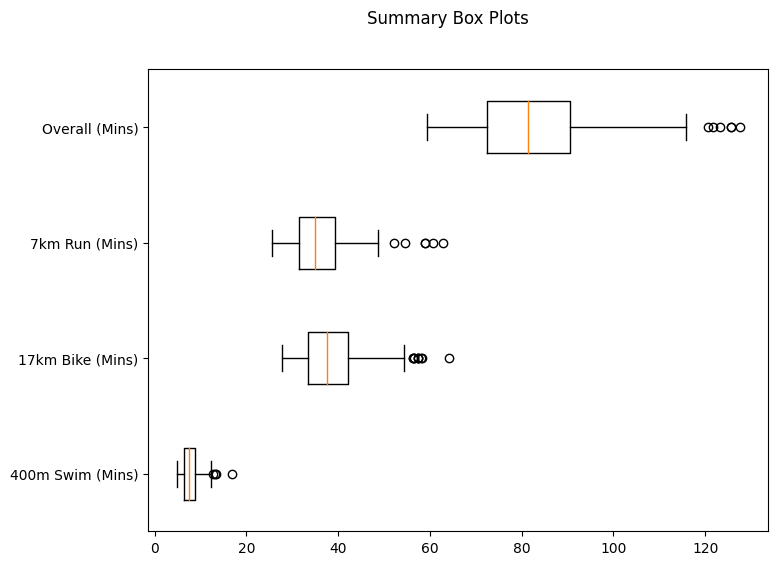

In [18]:
# I will create 4 plots, for each of the categiories
box_fig = plt.figure(figsize=(8, 6))
box_fig.suptitle("Summary Box Plots")

ax = box_fig.add_subplot(111)
ax.boxplot(x=df.iloc[:, range(2, 6)], labels=list(df.columns)[2:], vert=0)

ax

From this, it can be seen that most people got similar times for swimming, whereas there was a big difference in the overall time. The biggest differences in time could be seen in the 7km run and the 17 km run, which was expected, since the distance is much bigger. From this, I would thing 

Another way to see this, could be to measure the percentage of the score taken by each of the activities from the overall scores. I predict that the swim will obviously have the lowest percentage, and that the bike will have the most, with the 7km run not too far behind.

<Axes: >

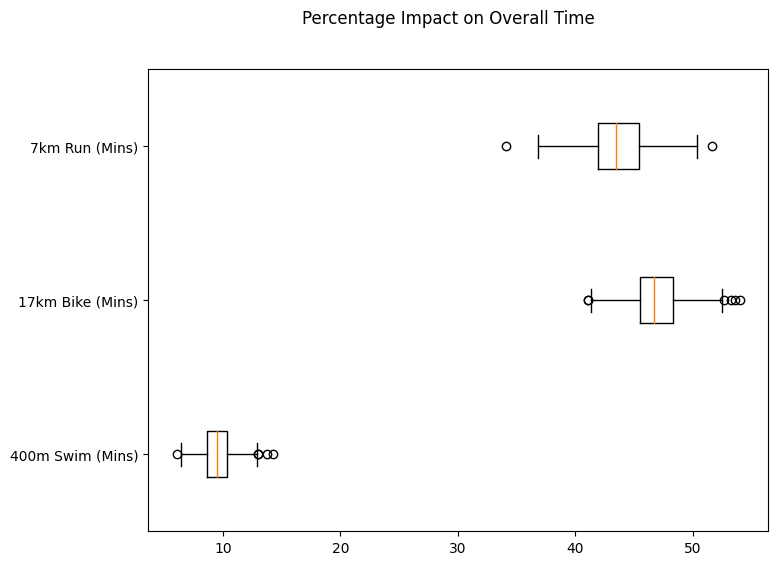

In [22]:
percentage_fig = plt.figure(figsize=(8, 6))
percentage_fig.suptitle("Percentage Impact on Overall Time")

ax = percentage_fig.add_subplot(111)
ax.boxplot(
    x=[(df[col] / df['Overall (Mins)']) * 100  for col in list(df.columns)[2:5]], 
    labels=list(df.columns)[2:5], 
    vert=0,
)

ax

From this, my hypothesis seems correct. Another thing which could be interesting would perhaps be about the correlation between the different percentages - by this, I mean that some people may have pushed themselves to run faster, which could have used up their energy in the bike ride, or vice versa. From this, peoples' strategies can be seen, and perhaps a pattern between winners could be found, by how they divide their time.

Text(0.5, 0, '7km Run (Mins)')

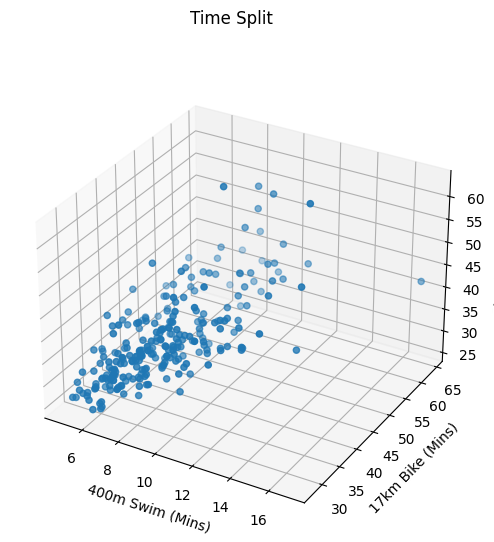

In [32]:
swim_percentage = df['400m Swim (Mins)'] / df['Overall (Mins)']
bike_percentage = df['17km Bike (Mins)'] / df['Overall (Mins)']
run_percentage = df['7km Run (Mins)'] / df['Overall (Mins)']

time_split_fig = plt.figure(figsize=(8, 6))
time_split_fig.suptitle("Time Split")

percentage_ax = time_split_fig.add_subplot(111, projection='3d')
percentage_ax.scatter(df['400m Swim (Mins)'], df['17km Bike (Mins)'], df['7km Run (Mins)'])
percentage_ax.set_xlabel("400m Swim (Mins)")
percentage_ax.set_ylabel("17km Bike (Mins)")
percentage_ax.set_zlabel("7km Run (Mins)")

As this is a 3d graph, it is a bit hard to visualise. To help me visualise this better, I created a figure with 3 2d graphs, which would show the percentage split in time and the position for each element. This would also help me find correlations better.

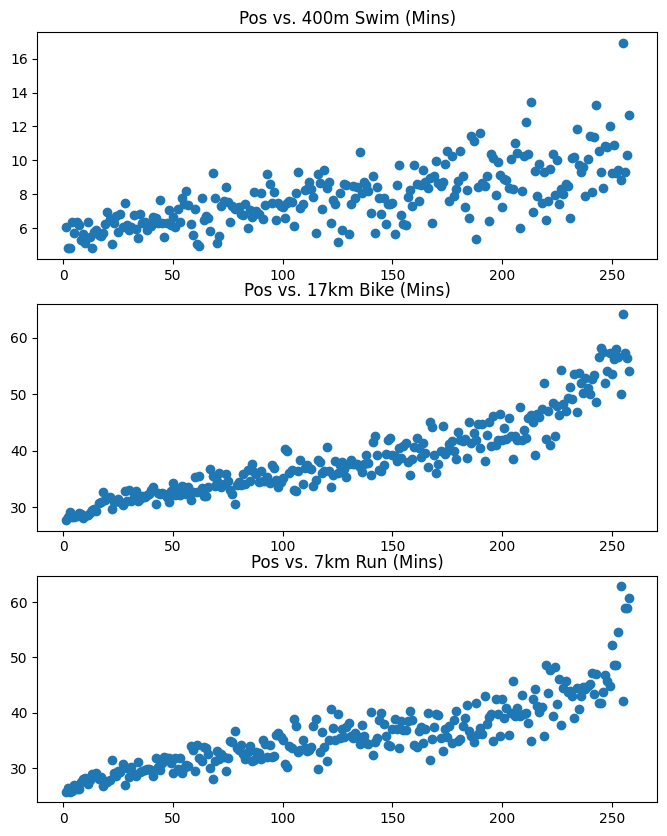

In [43]:
time_split_2d = plt.figure(figsize=(8, 10))

for index, col in enumerate(list(df.columns)[2:5]):
    ax = time_split_2d.add_subplot(3, 1, index + 1)
    ax.set_title(f'Pos vs. {col}')
    ax.scatter(
        x=df['Pos'],
        y=df[col],
    )



From this, it can be seen that the the 17km bike ride has the strongest correlation with the position. Overall, it seemed to be linear, with a curve at the end. There could be several reasons for this. One reason for this could be that there were different categories, such as male and female, and male veteran, etc. This could have lead to an upwards curve, as some categories would have just been slower for biological reasons, such as age or hormone production. There is also a possible psychological cause as well - people who were coming near the end of the triathlon may have lost hope of winning so would have put in less effort. This can be supported by the swimming graph as it was mostly linear, however this is probably also due to the swimming being only 400m, which is more likely.

I also wanted to see how the percentage split was as well.

In [ ]:
percentage_split_2d = plt.figure(figsize=(8, 10))

for index, col in enumerate(list(df.columns)[2:5]):
    ax = time_split_2d.add_subplot(3, 1, index + 1)
    ax.set_title(f'Pos vs. {col}')
    ax.scatter(
        x=df['Pos'],
        y=df[col] / df['Overall (Mins)'],
    )

